In [2]:
from langchain_openai import ChatOpenAI
import config

In [3]:
llm = ChatOpenAI(
    model="gpt-4o-mini",
    api_key=config.OPENAI_API_KEY
)

In [4]:
def multiply(a: int, b:int) -> int:
    """Multiply a and b
    Args:
        a (int): first int
        b (int): second int
    """
    return a*b

def add(a: int, b:int) -> int:
    """Adds a and b
    Args:
        a (int): first int
        b (int): second int
    """
    return a+b

def divide(a: int, b:int) -> float:
    """Adds a and b
    Args:
        a (int): first int
        b (int): second int
    """
    return a/b

In [5]:
llm_with_tools = llm.bind_tools(tools=[add, multiply, divide])

In [6]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

In [7]:
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmatic on a set of inputs.")

In [8]:
def assistant(state: MessagesState):
    return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

In [9]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [10]:
builder = StateGraph(MessagesState)

In [11]:
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools=[add, multiply, divide]))
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition
)
builder.add_edge("tools", "assistant")

In [12]:
react_graph = builder.compile()

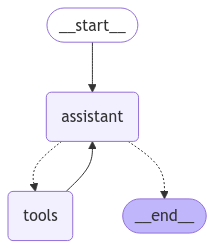

In [13]:
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [14]:
messages = [HumanMessage(content="add 30 and 40. Multiply the output with 50, divide the lats output by 5")]

In [15]:
messages = react_graph.invoke(input={"messages": messages})

In [16]:
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

add 30 and 40. Multiply the output with 50, divide the lats output by 5
================================== Ai Message ==================================
Tool Calls:
  add (call_VLZz7LNPzNCo115nbpS8AQp7)
 Call ID: call_VLZz7LNPzNCo115nbpS8AQp7
  Args:
    a: 30
    b: 40
================================= Tool Message =================================
Name: add

70
================================== Ai Message ==================================
Tool Calls:
  multiply (call_AoWjd1CBMdGMWAEmb5MbfQbj)
 Call ID: call_AoWjd1CBMdGMWAEmb5MbfQbj
  Args:
    a: 70
    b: 50
  divide (call_IJ9hUk7t9SafhxOVzqgvlA3M)
 Call ID: call_IJ9hUk7t9SafhxOVzqgvlA3M
  Args:
    a: 3500
    b: 5
================================= Tool Message =================================
Name: multiply

3500
================================= Tool Message =================================
Name: divide

700.0
================================== 

In [17]:
from langgraph.checkpoint.memory import MemorySaver

In [18]:
memory = MemorySaver()
react_graph_memory = builder.compile(checkpointer=memory)

In [19]:
config = {"configurable": {"thread_id": "123_abc"}}

In [20]:
messages = [HumanMessage(content="add 3 and 4.")]
messages = react_graph_memory.invoke(input={"messages": messages}, config=config)
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_KfnDjfFWtUFha0MHSM95dmHM)
 Call ID: call_KfnDjfFWtUFha0MHSM95dmHM
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================

The sum of 3 and 4 is 7.


In [21]:
messages = react_graph_memory.invoke(input={"messages": messages}, config=config)
for m in messages["messages"]:
    m.pretty_print()

ValueError: Message dict must contain 'role' and 'content' keys, got {'messages': [HumanMessage(content='add 3 and 4.', additional_kwargs={}, response_metadata={}, id='754aad3a-6bfa-48b4-ac25-6ada956a44a4'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_KfnDjfFWtUFha0MHSM95dmHM', 'function': {'arguments': '{"a":3,"b":4}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 167, 'total_tokens': 185, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-83f88523-7095-474f-9aaa-d494f3784701-0', tool_calls=[{'name': 'add', 'args': {'a': 3, 'b': 4}, 'id': 'call_KfnDjfFWtUFha0MHSM95dmHM', 'type': 'tool_call'}], usage_metadata={'input_tokens': 167, 'output_tokens': 18, 'total_tokens': 185, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), ToolMessage(content='7', name='add', id='2c664f5c-623d-445d-b4e2-cbeb7284771a', tool_call_id='call_KfnDjfFWtUFha0MHSM95dmHM'), AIMessage(content='The sum of 3 and 4 is 7.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 192, 'total_tokens': 206, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-a0120695-68e3-4cf8-9fd5-9b16e9838b9d-0', usage_metadata={'input_tokens': 192, 'output_tokens': 14, 'total_tokens': 206, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/MESSAGE_COERCION_FAILURE 

In [29]:
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_ueo4NC0a2hxmNM3d543ywocF)
 Call ID: call_ueo4NC0a2hxmNM3d543ywocF
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================

The sum of 3 and 4 is 7.


In [30]:
messages = [HumanMessage(content="multiply it with 90")]
messages = react_graph_memory.invoke(input={"messages": messages}, config=config)
for m in messages["messages"]:
    m.pretty_print()

================================ Human Message =================================

add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_ueo4NC0a2hxmNM3d543ywocF)
 Call ID: call_ueo4NC0a2hxmNM3d543ywocF
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================

The sum of 3 and 4 is 7.
================================ Human Message =================================

multiply it with 90
================================== Ai Message ==================================
Tool Calls:
  multiply (call_3cZgaVHqfgGgAbl1dqBAAlbg)
 Call ID: call_3cZgaVHqfgGgAbl1dqBAAlbg
  Args:
    a: 7
    b: 90
================================= Tool Message =================================
Name: multiply

630
================================== Ai Message ==================================

The product of 7 an

In [22]:
messages

{'messages': [HumanMessage(content='add 3 and 4.', additional_kwargs={}, response_metadata={}, id='754aad3a-6bfa-48b4-ac25-6ada956a44a4'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_KfnDjfFWtUFha0MHSM95dmHM', 'function': {'arguments': '{"a":3,"b":4}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 167, 'total_tokens': 185, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-83f88523-7095-474f-9aaa-d494f3784701-0', tool_calls=[{'name': 'add', 'args': {'a': 3, 'b': 4}, 'id': 'call_KfnDjfFWtUFha0MHSM95dmHM', 'type': 'tool_call'}], usage_metadata={'input_tokens': 167, 'output_tokens': 18, 'to

In [25]:
messages["messages"][1].response_metadata

{'token_usage': {'completion_tokens': 18,
  'prompt_tokens': 167,
  'total_tokens': 185,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_72ed7ab54c',
 'finish_reason': 'tool_calls',
 'logprobs': None}